<div style="text-align: center;">
    <a href="https://www.dataia.eu/">
        <img border="0" src="https://github.com/ramp-kits/template-kit/raw/main/img/DATAIA-h.png" width="90%"></a>
</div>

# Predicting Energy Consumption in a Building

<i> NOMS Prenoms A METTRE </i>

## Introduction

The dataset comes from a wireless sensor network installed in a house, collecting temperature and humidity data from different rooms. It also includes weather data from a nearby airport station and recorded energy usage of lighting fixtures and appliances,

The goal is to develop predictive models that accurately estimate household energy consumption based on the available data. By identifying key factors that influence energy use, participants will refine their models to enhance prediction accuracy and uncover meaningful patterns,

Understanding and predicting energy use is key to reducing waste, cutting costs, and supporting sustainability. Better energy management helps improve home automation, use resources more efficiently, and reduce environmental impact. Insights from this challenge can lead to new ideas and solutions, helping homeowners, energy providers, and policymakers create a greener and more efficient future.

## The features


<li> <code><b><span style="color:white">date</span></b></code>: written in the format year-month-day hour:minute:second <BR> 
It covers Janauary 2016 to April 2016. The Test Set covers May 2016 
<BR> <li> <code><b><span style="color:white">Appliances</span></b></code>, energy use in Wh <BR> <li> <code><b><span style="color:white">lights</span></b></code>, energy use of light fixtures in the house in Wh <BR> 
<li> <code><b><span style="color:white">T1</span></b></code>, Temperature in kitchen area, in Celsius <BR> 
<li> <code><b><span style="color:white">RH_1</span></b></code>, Humidity in kitchen area, in % <BR> <li> <code><b><span style="color:white">T2</span></b></code>, Temperature in living room area, in Celsius <BR> 
<li> <code><b><span style="color:white">RH_2</span></b></code>, Humidity in living room area, in % <BR> 
<li> <code><b><span style="color:white">T3</span></b></code>, Temperature in laundry room area <BR> <li> <code><b><span style="color:white">RH_3</span></b></code>, Humidity in laundry room area, in % <BR> 
<li> <code><b><span style="color:white">T4</span></b></code>, Temperature in office room, in Celsius <BR> 
<li> <code><b><span style="color:white">RH_4</span></b></code>, Humidity in office room, in % <BR> <li> <code><b><span style="color:white">T5</span></b></code>, Temperature in bathroom, in Celsius <BR> 
<li> <code><b><span style="color:white">RH_5</span></b></code>, Humidity in bathroom, in % <BR> <li> <code><b><span style="color:white">T6</span></b></code>, Temperature outside the building (north side), in Celsius <BR> 
<li> <code><b><span style="color:white">RH_6</span></b></code>, Humidity outside the building (north side), in % <BR> 
<li> <code><b><span style="color:white">T7</span></b></code>, Temperature in ironing room , in Celsius <BR> 
<li> <code><b><span style="color:white">RH_7</span></b></code>, Humidity in ironing room, in % <BR> <li> <code><b><span style="color:white">T8</span></b></code>, Temperature in teenager room 2, in Celsius <BR> 
<li> <code><b><span style="color:white">RH_8</span></b></code>, Humidity in teenager room 2, in % <BR> 
<li> <code><b><span style="color:white">T9</span></b></code>, Temperature in parents room, in Celsius <BR> 
<li> <code><b><span style="color:white">RH_9</span></b></code>, Humidity in parents room, in % <BR> <li> <code><b><span style="color:white">To</span></b></code>, Temperature outside (from Chièvres weather station), in Celsius <BR> 
<li> <code><b><span style="color:white">Pressure</span></b></code> (from Chièvres weather station), in mm Hg <BR> 
<li> <code><b><span style="color:white">RH_out</span></b></code>, Humidity outside (from Chièvres weather station), in % <BR> 
<li> <code><b><span style="color:white">Windspeed</span></b></code> (from Chièvres weather station), in m/s <BR> 
<li> <code><b><span style="color:white">Visibility</span></b></code> (from Chièvres weather station), in km <BR> 
<li> <code><b><span style="color:white">Tdewpoint</span></b></code> (from Chièvres weather station), °C <BR> 
<li> <code><b><span style="color:white">rv1</span></b></code>, Random variable 1, nondimensional <BR> 
<li> <code><b><span style="color:white">rv2</span></b></code>, Rnadom variable 2, nondimensional <BR>

# Exploratory data analysis

The goal of this section is to show what's in the data, and how to play with it.
This is the first set in any data science project, and here, you should give a sense of the data the participants will be working with.

You can first load and describe the data, and then show some interesting properties of it.

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
pd.set_option('display.max_columns', None)

# Load the data

import problem
X_df, y = problem.get_train_data()

In [14]:
df = pd.concat([X_df, y], axis=1)
df.index = pd.to_datetime(df.index)

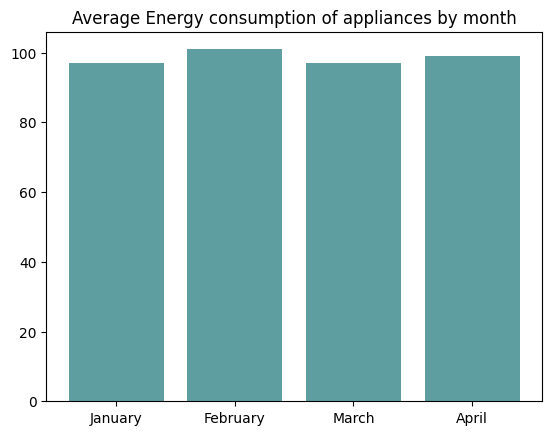

In [15]:
n_months = df.index.month.nunique()
plt.title('Average Energy consumption of appliances by month')
plt.bar(range(n_months), df['Appliances'].groupby(df.index.month).mean(), color='cadetblue')
plt.xticks(range(n_months), [calendar.month_name[i+1] for i in range(n_months)])
plt.show()

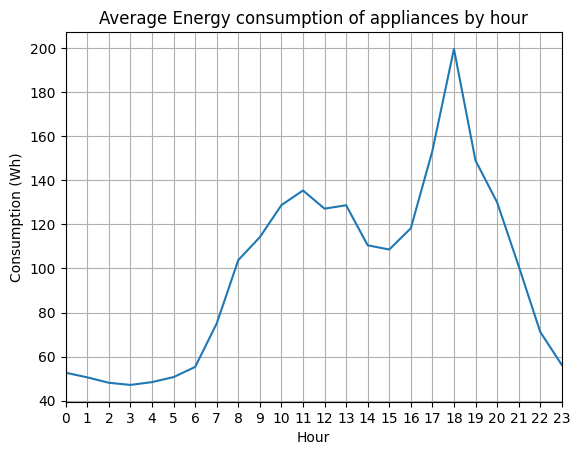

In [16]:
plt.title('Average Energy consumption of appliances by hour')
plt.plot(df['Appliances'].groupby(df.index.hour).mean())
plt.xlabel('Hour')
plt.ylabel('Consumption (Wh)')
plt.xlim((0,23))
plt.xticks(range(24))
plt.grid()

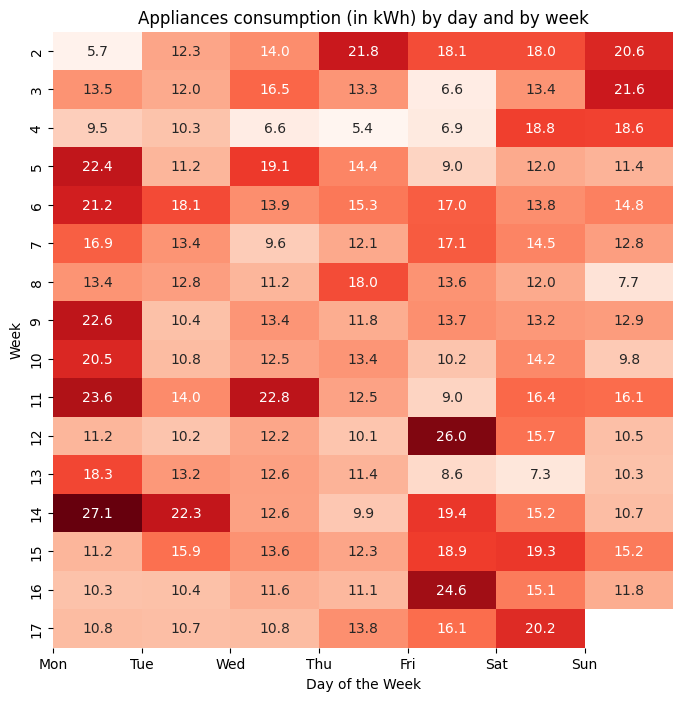

In [ ]:
daily_data = df['Appliances'].resample('D').sum()

weekly_data = daily_data.to_frame()
weekly_data['Week'] = weekly_data.index.isocalendar().week
weekly_data['DayOfWeek'] = weekly_data.index.dayofweek

pivot_data = weekly_data.pivot_table(index='Week', columns='DayOfWeek', values='Appliances', aggfunc='sum')

plt.figure(figsize=(8, 8))
sns.heatmap(pivot_data/1000, cmap='Reds', annot=True, fmt=".1f", cbar=False) #, cbar_kws={'label': 'Sum of appliances conso (kWh)'})
plt.title('Appliances consumption (in kWh) by day and by week')
plt.xlabel('Day of the Week')
plt.ylabel('Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Challenge evaluation

A particularly important point in a challenge is to describe how it is evaluated. This is the section where you should describe the metric that will be used to evaluate the participants' submissions, as well as your evaluation strategy, in particular if there is some complexity in the way the data should be split to ensure valid results.

# Submission format

Here, you should describe the submission format. This is the format the participants should follow to submit their predictions on the RAMP plateform.

This section also show how to use the `ramp-workflow` library to test the submission locally.

## The pipeline workflow

The input data are stored in a dataframe. To go from a dataframe to a numpy array we will use a scikit-learn column transformer. The first example we will write will just consist in selecting a subset of columns we want to work with.

In [2]:
# %load submissions/starting_kit/estimator.py

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def get_estimator():
    pipe = make_pipeline(
        StandardScaler(),
        LogisticRegression()
    )

    return pipe


## Testing using a scikit-learn pipeline

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(get_estimator(), X_df, y, cv=5, scoring='accuracy')
print(scores)

[0.97222222 0.96527778 0.97212544 0.95121951 0.96167247]


## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).